In [119]:
import numpy as np 
from matplotlib import pyplot as plt
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


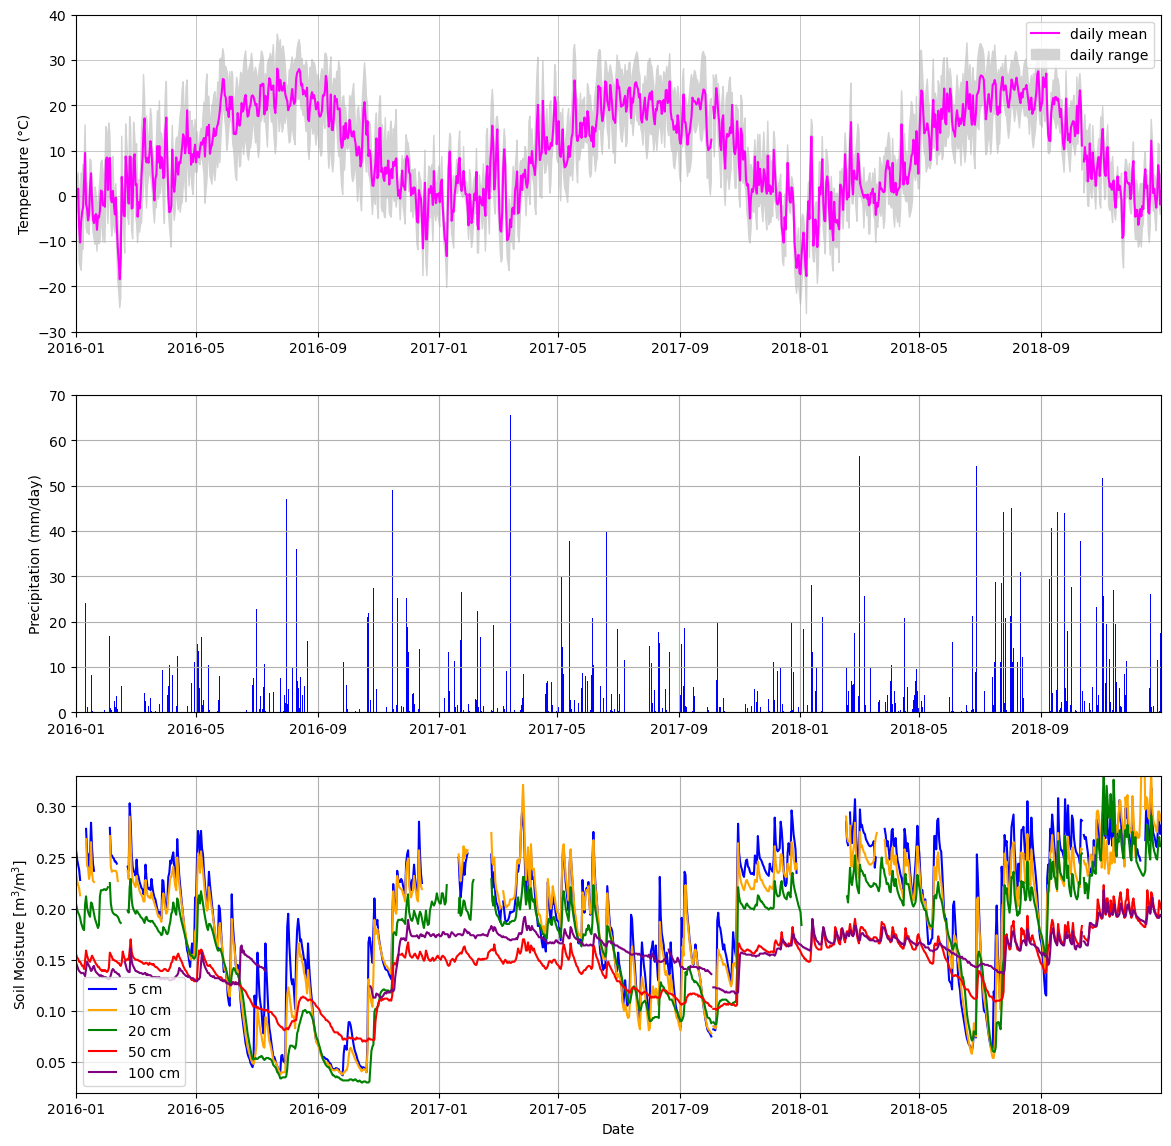

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

date = df.index.values

# Creating subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(14, 14))


# First plot 
axes[0].plot(date, t_daily_mean, color='magenta', label='daily mean')
axes[0].fill_between(date, y1= t_daily_max, y2= t_daily_min, color='lightgray', label="daily range")
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_ylim(-30, 40)
axes[0].grid(which='major', linewidth=0.5)
axes[0].legend(loc = 'upper right') 
axes[0].margins(x=0)

# Second plot 
axes[1].bar(date, p_daily_calc, align='edge', color='blue')  
axes[1].set_ylabel('Precipitation (mm/day)')
axes[1].set_ylim(0, 70) 
axes[1].margins(x=0)
axes[1].grid()

# Third plot 
axes[2].plot(date, soil_moisture_5, color='blue', label= '5 cm') 
axes[2].plot(date, soil_moisture_10, color='orange', label= '10 cm') 
axes[2].plot(date, soil_moisture_20, color='green', label= '20 cm') 
axes[2].plot(date, soil_moisture_50, color='red', label= '50 cm')  
axes[2].plot(date, soil_moisture_100, color='purple', label= '100 cm')
axes[2].set_xlabel('Date') 
axes[2].set_ylabel('Soil Moisture [m$^3$/m$^3$]')
axes[2].grid() 
axes[2].axes.set_ylim(0.02,0.33)
axes[2].margins(x=0)
axes[2].legend(loc = 'lower left')
plt.show()